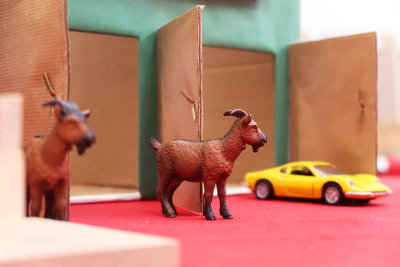

In [21]:
# github ne veut pas afficher mes images en markdown
from IPython.display import Image
Image(filename="Images/MontyHall.png")

     

# Simulation de Monty Hall 

Il s'agit de l'implémentaion du problème appelé Monty Hall en référence à l'animateur du jeu télévisé américain [Let's Make a Deal](https://fr.wikipedia.org/wiki/Let%27s_Make_a_Deal). L'énoncé est très simple, mais la solution est souvent considérée comme contre-intuitive.  

> « Supposez que vous êtes sur le plateau d'un jeu télévisé, face à trois portes et que vous devez choisir d'en ouvrir une seule, en sachant que derrière l'une d'elles se trouve une voiture et derrière les deux autres des chèvres. Vous choisissez une porte, disons la numéro 1, et le présentateur, qui sait, lui, ce qu'il y a derrière chaque porte, ouvre une autre porte, disons la numéro 3, porte qui une fois ouverte découvre une chèvre. Il vous demande alors : « désirez-vous ouvrir la porte numéro 2 ? ». Avez-vous intérêt à changer votre choix ? »

Il est nécessaire de compléter cet énoncé, pour éviter toute ambiguité par :
1. Le présentateur doit toujours ouvrir une porte  qui n'a pas été choisie par vous, derrière laquelle il y a une chèvre.
1. Le choix qui vous est offert est entre la porte choisie à l'origine et la porte fermée restante.

Pour déterminer la bonne stratégie, on simule le jeu et on le répète de nombreuse fois.

Commençons par réaliser une fonction qui tire aléatoirement la place de la voiture et le choix du joueur.



## Choix d'une porte par le joueur


In [22]:
import random

def simulation(modifie=False, nb_portes=3, graine=None, trace=False):

    if graine is not None:
        random.seed(graine)

    ou_est_la_voiture = random.randint(0, nb_portes - 1)
    choix = random.randint(0, nb_portes - 1)
    gagne = ou_est_la_voiture == choix
    if (trace):
        print(f"La voiture est derrière la porte # {ou_est_la_voiture + 1}")
        print(f"Le choix du joueur est la porte  # {choix + 1}")
    if (modifie):
        return not gagne
    else:
        return gagne
    
simulation(trace=True)
games = [i + 1 for i in range(10)]
games

La voiture est derrière la porte # 3
Le choix du joueur est la porte  # 2


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## On répéte n x fois l'expérience

On répète donc n fois l'expérience et on va compter le nombre de fois que l'on gagne. Pour cela on fixe la stratégie. 

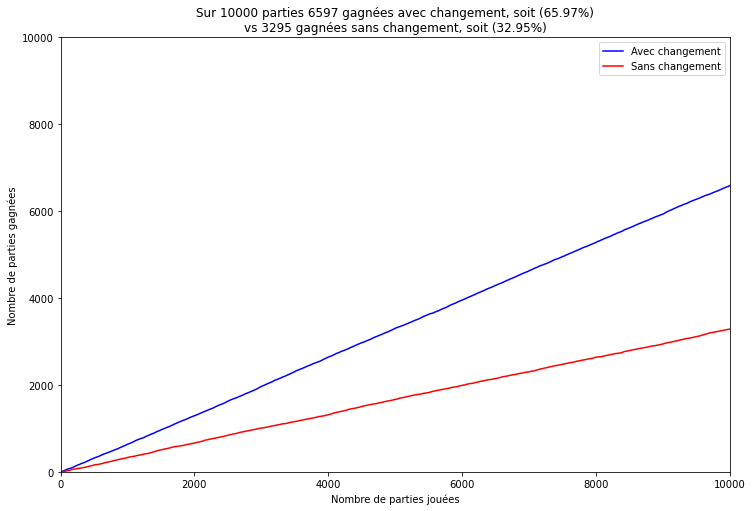

In [23]:
from random import seed
from numpy import mean, cumsum
from matplotlib import pyplot as plt
import os
import time

seed(12)
nb_iterations = 10000
resultat_avec_chgt = [simulation(modifie = True) for _ in range(nb_iterations)]
resultat_sans_chgt = [simulation(modifie = False) for _ in range(nb_iterations)]


titre = f'Sur {nb_iterations} parties {sum(resultat_avec_chgt)} gagnées avec changement, soit ({mean(resultat_avec_chgt) * 100:.2f}%)' + \
    '\n' + \
    f'vs {sum(resultat_sans_chgt)} gagnées sans changement, soit ({mean(resultat_sans_chgt) * 100:.2f}%)'
parties = [i+1 for i in range(nb_iterations)] 
plt.figure(figsize=(12, 8))
plt.plot(parties, cumsum(resultat_avec_chgt), color='blue', label='Avec changement')
plt.plot(parties, cumsum(resultat_sans_chgt), color='red', label='Sans changement')
plt.axis([0, nb_iterations, 0, nb_iterations])
plt.title(titre)
plt.legend()
plt.xlabel('Nombre de parties jouées')
plt.ylabel('Nombre de parties gagnées')

plt.show()

On constate que la bonne stratégie consiste donc à changer de porte pour augmenter ses chances. Nous avons à l'aide d'un petit programme trouvé la solution, mais les pigeons nous appelle à un peu d'humilité. En effet, Herbranson et Schroeder ont montré en 2010 que les pigeons après une centaine de tentatives retenaient que la bonne stratégie consistait à changer<span id="a1">[¹](#1)</span>.


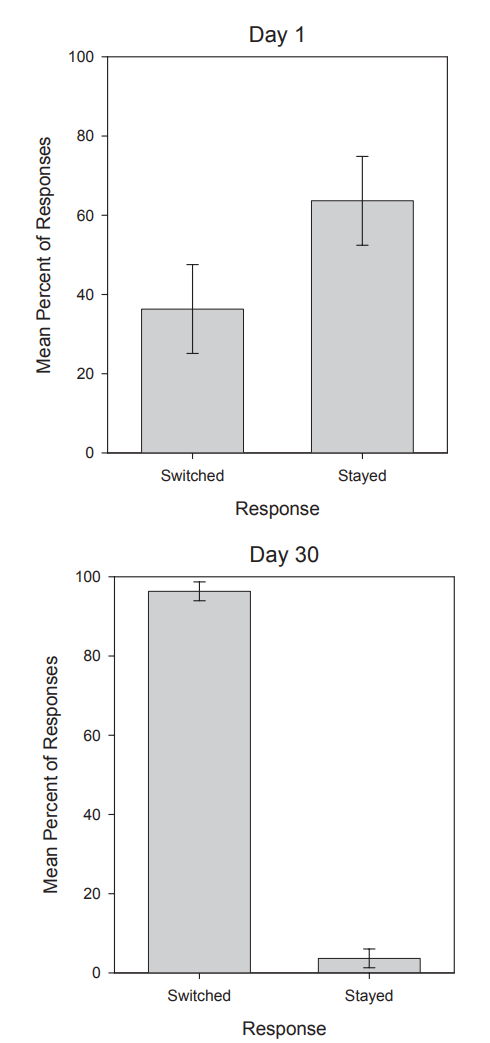

In [24]:
# github ne veut pas afficher mes images en markdown
from IPython.display import Image
Image(filename="Images/PigeonsMontyHall.png")


## Et avec des maths

Si on va un peu vite dans son raisonnement, il est possible de penser que derrière les deux portes non encore ouvertes il y a autant de chance de trouver la voiture. Il n'est donc pas nécessaire de changer puisque l'on a une chance sur deux. Ce n'est pas ce que nous montre, la simulation ! Cette dernière semble indiquer que la probabilité de gagner si on change son choix est de 2/3 contre seulement 1/3 si on le conserve. Il faut donc changer de porte !

### Comment s'en convaincre ? 

Supposons que l'on a fait le bon choix initialement, cela se produit dans 1/3 des cas. Maintenant si on a fait le mauvais choix (2/3 des cas), changer nous fait gagner. On gagne donc dans 2/3 des cas en changeant. 

Avec 3 portes il est parfois difficile de se convaincre de la validité du raisonnement. On peut essayer alors de considérer 100 portes. Lorsque vous choisissez l'une des portes vous avez 99% de de chances d'en choisir une avec une chèvre derrière et évidemment la probabilité d'ouvrir la porte qui cache la voiture est de 1 %. Considérons maintenant que Monty Hall ouvre 98 portes derrières lesquelles se trouvent 98 chèvres et que vous ayez toujours la possibilité de changer. Il y a 99 % de chance que cette porte cache la voiture. Vous avez donc tout intérêt à changer votre choix initial.


## Par le théorème de Bayes


Il permet de calculer des probabilités conditionnelles. Il exprime la probabilité de "$E_1$ sachant $E_2$" en fonction des probabilités de "$E_2$ sachant $E_1$" et de la probabilité de $E_1$.

$$
{\displaystyle P(E_1\mid E_2)={\dfrac {P(E_2\mid E_1)P(E_1)}{P(E_2)}}}, \text{à condition que } {\displaystyle P(E_2)\neq 0}
$$

* ${\displaystyle E_1}$ et ${\displaystyle E_2}$ sont deux évènements ;
* ${\displaystyle P(E_1)}$ et ${\displaystyle P(E_2)}$ sont la probabilité des deux évènements. Ce sont des probabilités _a priori_.
* ${\displaystyle P(E_1\mid E_2)}$ est la probabilité conditionnelle que l'évènement ${\displaystyle E_1}$ se réalise étant donné que l'évènement ${\displaystyle E_2}$ s'est réalisé. C'est la probabilité conditionnelle de {\displaystyle E_1} sachant {\displaystyle E_2} ou probabilité _a posteriori_ ;
* ${\displaystyle P(E_2\mid E_1)}$ est la probabilité conditionnelle que l'évènement ${\displaystyle E_2}$ se réalise étant donné que l'évènement ${\displaystyle E_1}$ s'est réalisé. C'est la probabilité conditionnelle de ${\displaystyle E_2}$ sachant ${\displaystyle E_1}$ ou probabilité _a posteriori_.

Utilisons la formule de Bayes dans le cas du Monty Hall. Soit $A$, $B$ et $C$ les trois portes. Supposons que nous choisissons la porte $A$ et que l'animateur ouvre la porte $B$. Nous devons calculer :
* ${\displaystyle P(A\mid B) = {\dfrac {P(B\mid A)P(A)}{P(B)}}}$, la probabilité que la voiture soit derrière la porte $A$, sachant que la porte $B$ a été ouverte.
* ${\displaystyle P(C\mid B) = {\dfrac {P(B\mid C)P(C)}{P(B)}}}$, la probabilité que la voiture soit derrière la porte $C$, sachant que la porte $B$ a été ouverte.

Allons y. Avant qu'aucune porte ne soit ouverte, les probabilités respectives qu'une voiture soit derrière $A$, $B$ ou $C$ sont de ${\displaystyle \frac{1}{3}}$.

* $P(A) = \frac{1}{3}$
* $P(C) = \frac{1}{3}$

Il faut maintenant déterminer $P(B\mid A)$ et $P(B\mid C)$. Si la voiture est derrière la porte $A$, alors l'animateur peut indifféremment ouvrir $B$ ou $C$. La probabilité est donc de $\frac{1}{2}$. Si la voiture est derrière $C$ l'animateur ne peut pas ouvrir $A$ car nous l'avons sélectionnée, il ne peut pas ouvrir $C$ car la voiture est derrière. Il ne lui reste que $B$.
* $P(B\mid A) = \frac{1}{2}$ 
* $P(B\mid C) = 1$ 

On a, par la formule de probabilités totales :
$$
    P(B) = P(B \mid A) P(A) + P(B \mid C) P(C)
$$

* ${\displaystyle P(A\mid B) = {\dfrac {P(B\mid A)P(A)}{P(B)}} = \frac{\frac{1}{2} \times \frac{1}{3}}{\frac{1}{2} \times \frac{1}{3} + 1 \times \frac{1}{3}} = \frac{1}{3}}$
* ${\displaystyle P(C\mid B) = {\dfrac {P(B\mid C)P(C)}{P(B)}} = \frac{1 \times \frac{1}{3}}{\frac{1}{2} \times \frac{1}{3} + 1 \times \frac{1}{3}} = \frac{2}{3}}$

Il est donc préférable de changer de porte.

## Références

<span id="1">
    
1- HERBRANSON, Walter T. and SCHROEDER, Julia, 2010. Are birds smarter than mathematicians? Pigeons (Columba livia) perform optimally on a version of the Monty Hall Dilemma. *Journal of Comparative Psychology* [online]. 2010. Vol. 124, no. 1, p. 1–13. DOI [10/ds2rnn](10/ds2rnn).</span>[⏎](#a1)<br>
